# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder # used for label encoding
from sklearn.preprocessing import StandardScaler #use for standard scaling(feature scaling)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split#used for splitting training and testing data
from sklearn.preprocessing import StandardScaler#StandardScaler is a class in scikit-learn used for standardizing features by removing the mean and scaling to unit variance.

# **Load dataset**

In [ ]:
Data=pd.read_csv("/content/drive/MyDrive/loan_data.csv");

In [ ]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
#give no. of rows and col
Data.shape

(381, 13)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


# **Handling Missing Data**

In [ ]:
Data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64



*  fillna():-This is a Pandas DataFrame method used to fill missing (NaN) values with some specified value.
*   .mode():-The .mode() function calculates the mode (most frequently occurring value) of the 'Gender' column. If there are multiple modes, it returns all of them.
*  .iloc[0]:- This selects the first element (index 0) from the result of .mode(). If there are multiple modes, this ensures that only the first mode is selected.
* .astype(int):-converts the data type of the column to int. This ensures that all values in the column are integers.

In [ ]:
Data['Gender']=Data['Gender'].fillna(Data['Gender'].mode().iloc[0])
Data['Self_Employed'] = Data['Self_Employed'].fillna(Data['Self_Employed'].mode().iloc[0])
Data['Loan_Amount_Term'] =Data['Loan_Amount_Term'].fillna(Data['Loan_Amount_Term'].mode().iloc[0]).astype(int)
Data['Credit_History'] = Data['Credit_History'].fillna(Data['Credit_History'].mode().iloc[0]).astype(int)

* .replace(['0', '1', '2', '3+'], [0, 1, 2, 3]):-The .replace() method is used to replace specific values in the DataFrame.['0', '1', '2', '3+'] is a list of the values you want to replace. These are the original string values in the Dependents column.
* The main reason for doing this replacement is to convert the Dependents column from categorical string values to numerical values, which can be useful for numerical operations and modeling in data analysis.

**Converted using label or ordinal encoding method**

In [ ]:
Data['Dependents'] = Data['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
Data['Dependents'] = Data['Dependents'].fillna(Data['Dependents'].mode().iloc[0])

In [ ]:
Data['CoapplicantIncome'] = Data['CoapplicantIncome'].astype(int)
Data['LoanAmount'] = Data['LoanAmount'].astype(int)

In [ ]:
#again checking null values removed or not
Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Converting Categorical data into numerical form**

* Using Label encoding:-Label encoding involves mapping each category to a unique integer. This is done for variables that have a natural order or for those with only two categories (binary encoding).
* Using One-Hot Encoding:-One-hot encoding converts  categorical variable is nominal (does not have an intrinsic order) into binary vectors. For a categorical feature with "n" unique values, one-hot encoding creates "n-1" binary columns (if drop_first=True), where each column represents one category.


In [ ]:
Data['Gender'] = Data['Gender'].map({'Male': 1, 'Female': 0})
Data['Married'] = Data['Married'].map({'Yes': 1, 'No': 0})
Data['Education'] = Data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
Data['Self_Employed'] = Data['Self_Employed'].map({'Yes': 1, 'No': 0})
Data['Loan_Status']=Data['Loan_Status'].map({'Y':1,'N':0})
Data['Dependents'] = Data['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])

In [ ]:
# to convert property area into numerical value first we need to import label encoder library
# Now create label encoder object
label_encoder = LabelEncoder()

#Now Fit and transform the Property_Area column:
# Fit :-The fit method analyzes the data and learns the encoding. For label encoding, this means it identifies all unique values in the column and assigns an integer to each one
# Transform:-The transform method applies the learned encoding to the data, converting each category to its corresponding integer.

Data['Property_Area'] = label_encoder.fit_transform(Data['Property_Area'])

In [ ]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,1,0,4583,1508,128,360,1,0,0
1,LP001005,1,1,0.0,1,1,3000,0,66,360,1,2,1
2,LP001006,1,1,0.0,0,0,2583,2358,120,360,1,2,1
3,LP001008,1,0,0.0,1,0,6000,0,141,360,1,2,1
4,LP001013,1,1,0.0,0,0,2333,1516,95,360,1,2,1


# **Feature Scaling**

In [ ]:
#Standardize or normalize numerical features to bring them to a similar scale.
scaler = StandardScaler()
Data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(Data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

# **Analyzing categorical data by creating graph**

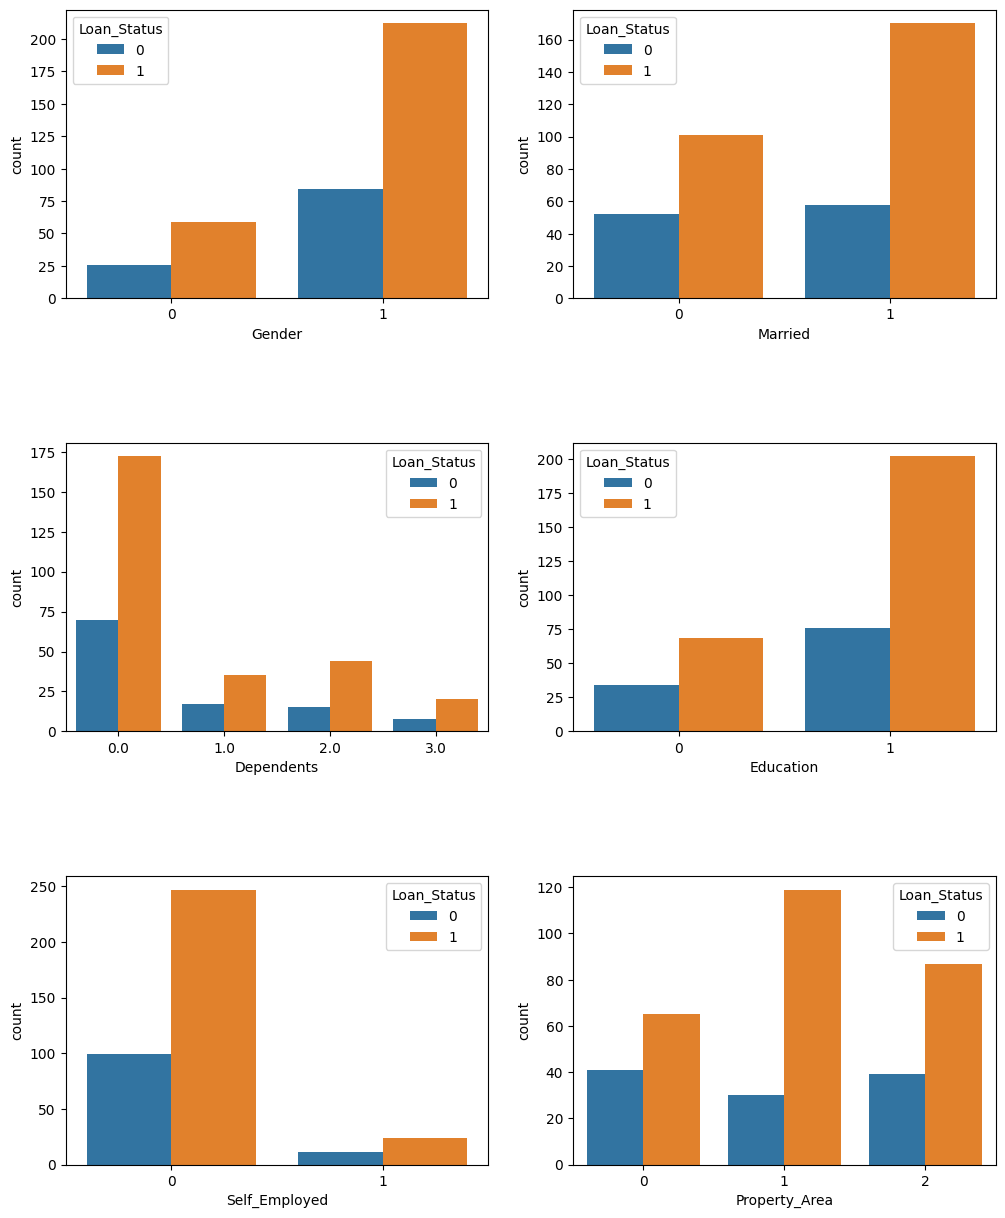

In [ ]:
# Define the list of categorical variables
c_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


# Create a figure and a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Flatten the axes array for easier iteration(Converts the 2D array of axes into a 1D array for easier iteration)
axes = axes.flatten()

#Iterates over the list of categorical variables and creates a count plot for each one, with the bars colored by the Loan_Status(hue='Loan_Status')
#enumerate:- allows you to loop over the list c_variables while keeping track of both the index (i) and the value (cat_col).
for i, cat_col in enumerate(c_variables):
    sns.countplot(x=cat_col, data=Data, hue='Loan_Status', ax=axes[i])

#Adjusts the vertical spacing between subplots for better readability.
plt.subplots_adjust(hspace=0.5)

# **Analyzing numerical values by creating graph**

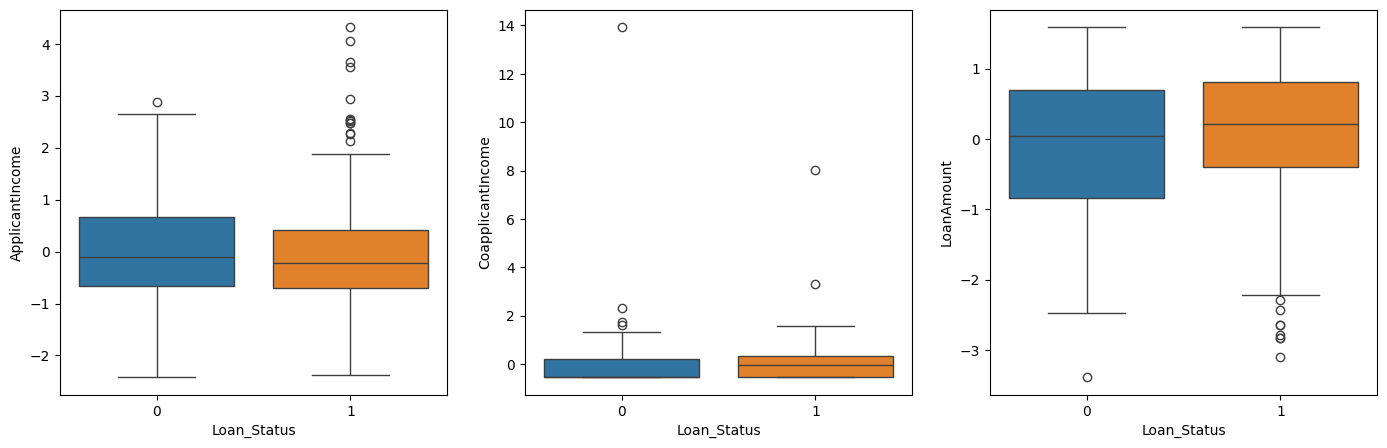

In [ ]:
# Define the list of numeric variables
c_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create a figure and a 3x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

#Iterates over the list of categorical variables and creates a box plot for each one, with the bars colored by the Loan_Status(hue='Loan_Status')
#enumerate:- allows you to loop over the list c_variables while keeping track of both the index (i) and the value (cat_col).
for i, cat_col in enumerate(c_variables):
    sns.boxplot(y=cat_col, data=Data, x='Loan_Status',hue='Loan_Status',ax=axes[i],legend=False)

#Adjusts the vertical spacing between subplots for better readability.
plt.subplots_adjust(hspace=0.5)

# **Preprocessing data**

In [ ]:
# Drop the 'Loan_ID' column
Data = Data.drop('Loan_ID', axis=1)

#X=drop(['Loan_Status']) means you are creating a new DataFrame (X) that includes all columns from the original DataFrame (Data) except for the 'Loan_Status' column.
#axis=1 specifies that you're dropping a column. (If it were axis=0, it would mean you're dropping rows.)
#So, X will contain all the input features (e.g., 'Gender', 'Married', 'Education', 'ApplicantIncome', etc.) except for the 'Loan_Status' column, which is your target variable.
X = Data.drop(['Loan_Status'], axis=1)

#This selects just the 'Loan_Status' column from the DataFrame (Data) and assigns it to y.
#y will contain only the target variable that you want to predict, which indicates whether a customer is eligible for a loan (often marked as 'Y' for yes and 'N' for no).
y = Data['Loan_Status']

In [ ]:
X.shape, y.shape

((381, 11), (381,))

# **Splitting dataset into training and testing data**

In [ ]:
#train_test_split :-is a function from the sklearn.model_selection module that splits arrays or matrices into random train and test subsets.
#X:- The input features (data) you will use to train your model.
#y:- The target variable (labels) you want to predict.
#test_size=0.2:- This means 20% of the data will be used for testing, and the remaining 80% will be used for training.
#For example, if you have 1000 data points, 800 will be used for training and 200 for testing.
#random_state=42:- This ensures that the split is reproducible. Setting a random state to a fixed number (like 42) means that every time you run the code, you will get the same split of data. This helps in getting consistent results during experiments.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (304, 11) (304,)
Testing set shape: (77, 11) (77,)


In [ ]:
#This initializes the StandardScaler object, which will be used to transform your data.
scaler = StandardScaler()

#Fit the Scaler on Training Data.
#The fit_transform method calculates the mean and standard deviation of the training data and scales it accordingly.

X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler fitted on the training data.
#The transform method scales the test data using the mean and standard deviation calculated from the training data.
X_test = scaler.transform(X_test)

# **Model:- Decision tree classifier**

In [ ]:
#DecisionTreeClassifier:- This is the class from scikit-learn that allows us to create and use a Decision Tree model for classification.
#accuracy_score and roc_auc_score:- These are functions from scikit-learn used to evaluate the performance of the model. accuracy_score calculates how often the classifier is correct, and roc_auc_score measures the model's ability to distinguish between classes.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

#DecisionTreeClassifier:- This initializes the Decision Tree classifier.
#max_depth=3:- This parameter sets the maximum depth of the tree to 3 levels. Limiting the depth of the tree helps prevent overfitting by ensuring that the tree does not become too complex.
#Depth of the tree:- This refers to the number of levels in the tree, from the root node to the deepest leaf node.
#min_samples_leaf=35:- This parameter specifies that a leaf node must have at least 35 samples. This prevents the tree from creating nodes that are based on a very small subset of the data, which can also help in reducing overfitting.3
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)

#fit(X_train, y_train): This method trains the Decision Tree model on the training data (X_train) and the corresponding labels (y_train).
#X_train: The training features (e.g., applicant income, loan amount, etc.).
#y_train: The target variable for training (e.g., whether the loan was approved or not).
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

# **Testing**

In [ ]:
#model.predict(X_test):- This line uses the trained Decision Tree model to make predictions on the test data (X_test).
#y_pred:- The predicted labels for the test set.
y_pred = model.predict(X_test)

#accuracy_score(y_test, y_pred):- This function calculates the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).
#accuracy:- The accuracy score, which represents the proportion of correctly classified instances out of the total instances.
accuracy = accuracy_score(y_test, y_pred)
#roc_auc_score(y_test, y_pred):- This function calculates the ROC AUC score, which is a measure of the model's ability to distinguish between the classes (e.g., loan approved 'Y' or not approved 'N').
#roc_score:- The ROC AUC score.
roc_score = roc_auc_score(y_test, y_pred)

#f'Accuracy Score:- {accuracy*100:0.2f}%': This line formats and prints the accuracy score as a percentage with two decimal places.
#f'Roc Score:- {roc_score*100:0.2f}%': This line formats and prints the ROC AUC score as a percentage with two decimal places.
print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 81.82%
Roc Score: 66.67%


In [ ]:
# pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True): This line creates a confusion matrix using pandas.
# y_test: The true labels of the test set.
# y_pred: The predicted labels of the test set.
# rownames=['True']: Labels the rows as 'True' values.
# colnames=['Predicted']: Labels the columns as 'Predicted' values.
# margins=True: Adds totals for the rows and columns.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7,14,21
1,0,56,56
All,7,70,77
